In [1]:
import numpy as np
from matplotlib import pyplot as pl
from scipy import stats

In [2]:
%%time
count = 10000
#np.random.seed(42)

# Generate data with random noise
x = np.random.rand(count) * 10 
#y = (np.random.rand() + .5) * x + 2 * np.random.rand(count) - 1 + 5 * np.random.rand()
y = (.5 + np.random.rand()) * x + np.random.normal(0, 0.5, count) + 5 * np.random.rand()

A = np.array([np.ones(count), x]).T

CPU times: user 1.21 ms, sys: 673 µs, total: 1.88 ms
Wall time: 1.27 ms


In [3]:
%%time
b = np.linalg.lstsq(A, y)[0]
print(b)


[3.14455913 1.09740731]
CPU times: user 2.55 ms, sys: 2.08 ms, total: 4.62 ms
Wall time: 4.8 ms


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [4]:
%%time
b = np.linalg.inv(A.T.dot(A)).dot(A.T.dot(y))
print(b)

[3.14455913 1.09740731]
CPU times: user 1.34 ms, sys: 1.49 ms, total: 2.83 ms
Wall time: 2.77 ms


In [5]:
%%time
b = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y))
print(b)

[3.14455913 1.09740731]
CPU times: user 1.7 ms, sys: 1.4 ms, total: 3.1 ms
Wall time: 3.93 ms


In [6]:
%%time
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
b = [intercept, slope]
print(b)

[3.1445591320226605, 1.0974073116303305]
CPU times: user 2.35 ms, sys: 1.71 ms, total: 4.06 ms
Wall time: 4.17 ms


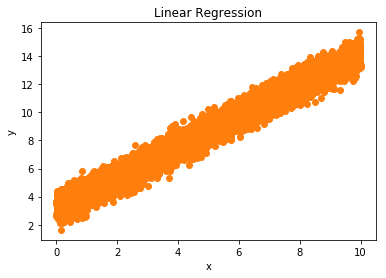

In [7]:
line = b[1]*np.arange(0, 10) + b[0]
pl.plot(line, '-')
pl.plot(x, y, 'o')
pl.title('Linear Regression')
pl.xlabel('x')
pl.ylabel('y')
pl.show()